# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.13639807, 0.47924837, 0.46317347])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [10]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    
        
    # dot product는 두 벡터의 내적을 계산하는 연산임,
    # 내적되는 두 벡터는 feature 벡터와 parameter 벡터임. 
    return z

## Logistic Function

## $p = \frac{1}{1 + e^{-\mathbf{X_i} \cdot \mathbf{\theta}}}$

In [11]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1/(1+ np.exp(-z))
    # logistic function을 이용해서 범위가 제한되지 않은 X값들을 
    # 정의한 시그모이드 함수를 이용해 y값을 [0,1]로 제한한 것
    return p

In [12]:
logistic(X_train.iloc[1], parameters)

0.6736941859991545

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\sum_{i=1}^{m} \left( y_i \log({p}(X_i)) + (1 - y_i) \log(1 - {p}(X_i)) \right)$

In [13]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters) # Y_Pred라고 말하는 계산된 확률값
    loss = - y* np.log(p) + (1 - y) * np.log(1 - p)
    
    return loss

# 로지스틱 회귀의 확률값과 실제 타겟값의 오차를 계산하는 함수임. 

In [14]:
def mse_i(X, y, parameters):
    # theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    y_hat = dot_product(X, parameters)
    loss = np.power(y-y_hat,2) / 2
    return loss

# 평균을 고려하는 것은 이후에 한다고 했으니 오차의 제곱까지만 구현
# y_hat을 구현하기 위해 theta라는 베타변수 정의 

In [15]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X,y,parameters)
    
    loss /= n #loss 평균값으로 계산
    return loss

In [16]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

-0.7137898427701908

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= - \sum_{i=1}^{m}(y_i - {\theta}^{T}X_i)X_{ij} $

## ${\partial\over{\partial \theta_j}}l(p)= - \sum_{i=1}^{m} (y_i - p_i)X_{ij}$

In [17]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters) # 선형회귀 예측값
        gradient = -(y-y_hat) * X[j]
            # 선형회귀의 gradient. 이 코드는 모델이 linera일 때 gradient 계산함
            # 선형회귀의 손실함수 = MSE 
    else:
        p = logistic(X, parameters) 
        gradient = -(y-p)*X[j]
            # 로지스틱 회귀의 gradient 
    return gradient

In [18]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.10807688420964214

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [19]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
             
    
    return gradients

In [20]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[37.00739539469123, 9.187667861005378, 40.729345378984014]

## mini-batch
인덱스로 미니 배치 나누기

In [21]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 
- X_train과 batch_size를 인자로 받아서 미니배치를 생성함
- 먼저 입력 데이터의 개수 'N'을 구한다
- 한개의 미니배치에 포함될 개수인 batch_size를 사용하여 전체 데이터 개수를 n으로 나눔. 
- 추가적인 미니배치가 필요한 경우 이를 nb에 저장.
- 인덱스를 나타내는 배열 idx를 0부터 n-1까지 생성
- idx배열을 nb개수만큼 미니 배치로 나눠서 각 미니 배치에 해당하는 인덱스 리스트 저장, 
- idx_list 반환. 
- 이후 gradient descent에서 idex_list를 사용하여 각 미니배치에 해당하는 데이터만 선택하여 학습 가능. 

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [22]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate/n
    
    
    parameters -= gradients 
    # 파라미터를 업데이트 한다
    return parameters

In [23]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.13393091, 0.47863586, 0.46045818])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 전체 데이터셋을 이용해 학습한 횟수 
- num_epoch: 학습 알고리즘에서 지정한 총 epoch의 수. 학습을 몇 번의 epoch까지 수행할지 결정하는 값
<br>

- BGD: 학습 한번에 모든 데이터 셋을 이용해 기울기를 업데이트
- SGD: 학습 한번에 1개의 데이터를 이용해 기울기를 업데이트  
- MGD: 학습 한번에 데이터 셋의 일부만 사용해 기울기 업데이트 
<br>
- batch_size에 따른 경사하강법의 종류를 적어주세요  
- batch_size=1 -> SGD 
- batch_size=k -> MGD
- batch_size=whole -> BGD  

In [24]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, 
                     tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
      
            loss = new_loss
            
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [25]:
new_param_bgd = gradient_descent(X_train, y_train)
new_param_bgd

epoch: 0  loss: -1.1215414790029137  params: [0.38341275 0.2229233  0.57414167]  gradients: [0.05917831760875955, 0.053608349604660016, 0.06948316032208575]
epoch: 100  loss: -0.07605223220430211  params: [-1.5531853   3.04421657 -2.99307075]  gradients: [0.007432015075287283, 0.010930891802396696, 0.014587087024519227]
epoch: 200  loss: -0.07401991996827935  params: [-1.77048919  3.73649008 -3.6468187 ]  gradients: [0.0069763730041508985, 0.010566405216881018, 0.013087393517463393]
epoch: 300  loss: -0.07352816269659793  params: [-1.86678352  4.03778659 -3.92882529]  gradients: [0.006856820864346068, 0.01044633497450161, 0.012561482036683428]
epoch: 400  loss: -0.073344639122005  params: [-1.91539051  4.18900274 -4.06980968]  gradients: [0.006810070385417025, 0.010393181657271908, 0.012321973448323899]


array([-1.92434901,  4.22967564, -4.0845647 ])

### Predict Label

In [26]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p= logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [27]:
from sklearn.metrics import *

In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 1,  9]], dtype=int64)

In [29]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.94


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [30]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [31]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [32]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.71848196, 2.37862128])

In [33]:
#경사하강법
new_param = gradient_descent(X,y, model = "linear")
new_param

epoch: 0  loss: 0.92102371446855  params: [1.38963239 0.72506705]  gradients: [-0.08247709272575865, -0.07112947130784683]
epoch: 100  loss: 0.510953154498806  params: [0.72294196 2.45743262]  gradients: [-0.03108183844021062, -0.025011156478234514]
epoch: 200  loss: 0.5107664886854479  params: [0.72132875 2.46023777]  gradients: [-0.0310607158714948, -0.024976210376773895]
epoch: 300  loss: 0.5107661603949348  params: [0.7213259  2.46024271]  gradients: [-0.031060678660692537, -0.02497614881359526]
epoch: 400  loss: 0.5107661598166001  params: [0.7213259  2.46024272]  gradients: [-0.03106067859513977, -0.024976148705141872]
epoch: 500  loss: 0.5107661598155812  params: [0.7213259  2.46024272]  gradients: [-0.031060678595024243, -0.024976148704950758]
epoch: 600  loss: 0.5107661598155796  params: [0.7213259  2.46024272]  gradients: [-0.031060678595024104, -0.024976148704950515]
epoch: 700  loss: 0.5107661598155796  params: [0.7213259  2.46024272]  gradients: [-0.031060678595024104, -0.

array([0.7213259 , 2.46024272])

In [34]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

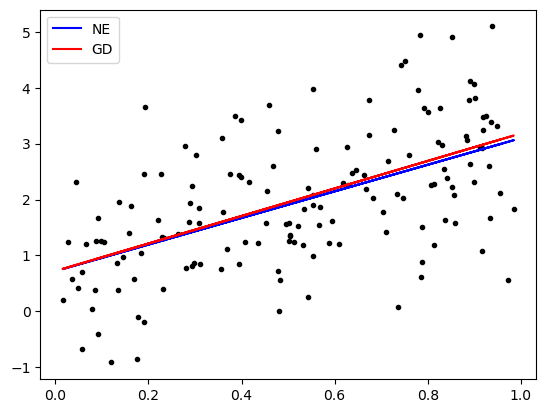

In [35]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()